https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [ ]:
f = 3*a**3 - b**2

df/da = 9a²
df/db = -2b

Se f for uma função de loss, usamos o backward para computar os gradientes com respeito as variaveis "a" e "b"

In [ ]:
f.backward(gradient=torch.tensor([1.,1.]))

In [ ]:
print(f"Gradiente esperado para a: {9*a**2}")
print(f"Gradiente esperado para b: {-2*b}\n")

print(f"Gradiente computado para a: {a.grad}")
print(f"Gradiente computado para b: {b.grad}")


Gradiente esperado para a: tensor([36., 81.], grad_fn=<MulBackward0>)
Gradiente esperado para b: tensor([-12.,  -8.], grad_fn=<MulBackward0>)

Gradiente computado para a: tensor([36., 81.])
Gradiente computado para b: tensor([-12.,  -8.])


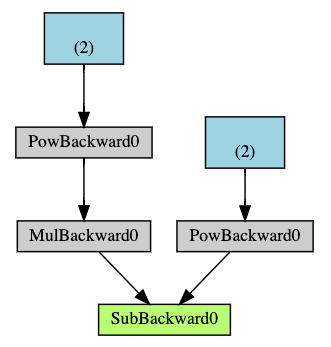

In [ ]:
c = torch.tensor([2., 3.], requires_grad=False)
d = torch.tensor([6., 4.], requires_grad=True)
f = 3*c**3 - d**2
f.backward(gradient=torch.tensor([1.,1.]))

print(f"Gradiente computado para c: {c.grad}")
print(f"Gradiente computado para d: {d.grad}")

Gradiente computado para c: None
Gradiente computado para d: tensor([-12.,  -8.])


In [ ]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights=ResNet18_Weights.DEFAULT)

input = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

optim.zero_grad()
prediction = model(input)
loss = (prediction - labels).sum()
loss.backward() # calcula os gradientes do modelo
optim.step()    # aplica os gradientes nos pesos